# Fake News Detection - Classical Machine Learning Models

This notebook implements and compares classical machine learning models for fake news detection using TF-IDF vectorization and traditional algorithms.

## Objectives
- Implement Naive Bayes classifier
- Implement Logistic Regression
- Implement Support Vector Machine (SVM)
- Implement Random Forest
- Compare model performance
- Analyze feature importance
- Generate evaluation metrics and visualizations


In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

# Machine learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Add src directory to path
current_dir = os.getcwd()
if current_dir.endswith('notebooks'):
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import custom utilities
from preprocessing import load_processed_data
from models import (
    calculate_metrics, print_metrics, plot_confusion_matrix,
    print_classification_report, compare_models, plot_model_comparison,
    plot_all_metrics_comparison, perform_cross_validation, print_cv_results
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Project root: {project_root}")


Libraries imported successfully!
Project root: /Users/manalaamir/Documents/Fake News Detection -NLP


## 1. Load Processed Data


In [2]:
# Load processed training and test data
train_path = os.path.join(project_root, 'data', 'processed', 'train_data.csv')
test_path = os.path.join(project_root, 'data', 'processed', 'test_data.csv')

print("Loading processed datasets...")
train_df = load_processed_data(train_path)
test_df = load_processed_data(test_path)

print(f"\nTraining set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

# Separate features and labels
X_train = train_df.drop(columns=['real'])
y_train = train_df['real']
X_test = test_df.drop(columns=['real'])
y_test = test_df['real']

print(f"\nTraining labels distribution:")
print(y_train.value_counts())
print(f"\nTest labels distribution:")
print(y_test.value_counts())


Loading processed datasets...

Training set: (18556, 15)
Test set: (4640, 15)

Training labels distribution:
real
1    13952
0     4604
Name: count, dtype: int64

Test labels distribution:
real
1    3489
0    1151
Name: count, dtype: int64


## 2. Prepare Text Features with TF-IDF


In [3]:
# Extract cleaned text for TF-IDF vectorization
X_train_text = X_train['title_cleaned'].astype(str)
X_test_text = X_test['title_cleaned'].astype(str)

# Initialize TF-IDF vectorizer
# Using max_features to limit vocabulary size and improve performance
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,  # Minimum document frequency
    max_df=0.95,  # Maximum document frequency
    stop_words='english'
)

print("Fitting TF-IDF vectorizer on training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"\nTF-IDF matrix shape:")
print(f"Training: {X_train_tfidf.shape}")
print(f"Test: {X_test_tfidf.shape}")
print(f"\nVocabulary size: {len(tfidf_vectorizer.vocabulary_)}")


Fitting TF-IDF vectorizer on training data...

TF-IDF matrix shape:
Training: (18556, 5000)
Test: (4640, 5000)

Vocabulary size: 5000


## 3. Model 1: Naive Bayes


In [4]:
# Train Naive Bayes model
print("Training Naive Bayes model...")
start_time = time.time()

nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate metrics
metrics_nb = calculate_metrics(y_test, y_pred_nb, "Naive Bayes")
print_metrics(metrics_nb)


Training Naive Bayes model...
Training completed in 0.01 seconds
MODEL: Naive Bayes

Overall Metrics:
  Accuracy:  0.8373
  Precision: 0.8290
  Recall:    0.8373
  F1-Score:  0.8268

Class 0 (Fake News) Metrics:
  Precision: 0.7457
  Recall:    0.5222
  F1-Score:  0.6142

Class 1 (Real News) Metrics:
  Precision: 0.8565
  Recall:    0.9412
  F1-Score:  0.8969


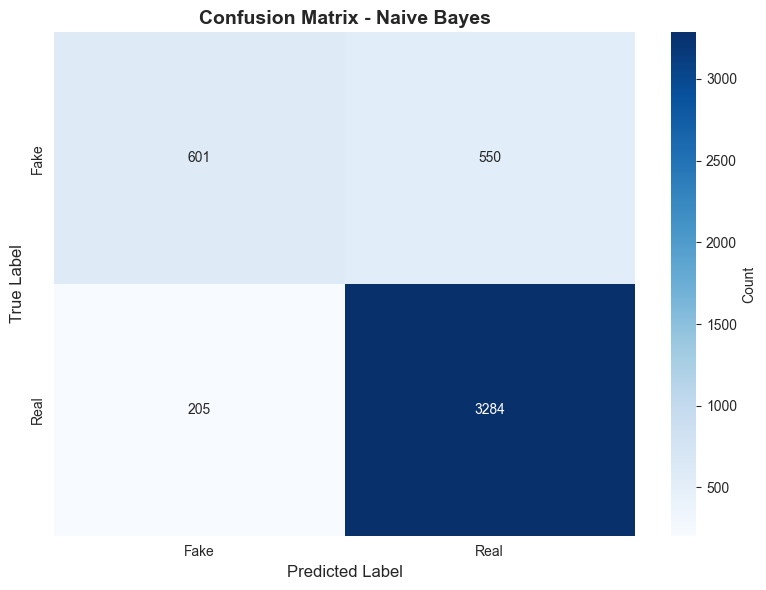


Classification Report - Naive Bayes
              precision    recall  f1-score   support

        Fake     0.7457    0.5222    0.6142      1151
        Real     0.8565    0.9412    0.8969      3489

    accuracy                         0.8373      4640
   macro avg     0.8011    0.7317    0.7556      4640
weighted avg     0.8290    0.8373    0.8268      4640



In [5]:
# Confusion matrix and classification report
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")
print_classification_report(y_test, y_pred_nb, "Naive Bayes")


## 4. Model 2: Logistic Regression


In [6]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
lr_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Calculate metrics
metrics_lr = calculate_metrics(y_test, y_pred_lr, "Logistic Regression")
print_metrics(metrics_lr)


Training Logistic Regression model...
Training completed in 0.08 seconds
MODEL: Logistic Regression

Overall Metrics:
  Accuracy:  0.8086
  Precision: 0.8309
  Recall:    0.8086
  F1-Score:  0.8157

Class 0 (Fake News) Metrics:
  Precision: 0.5893
  Recall:    0.7541
  F1-Score:  0.6616

Class 1 (Real News) Metrics:
  Precision: 0.9106
  Recall:    0.8266
  F1-Score:  0.8666


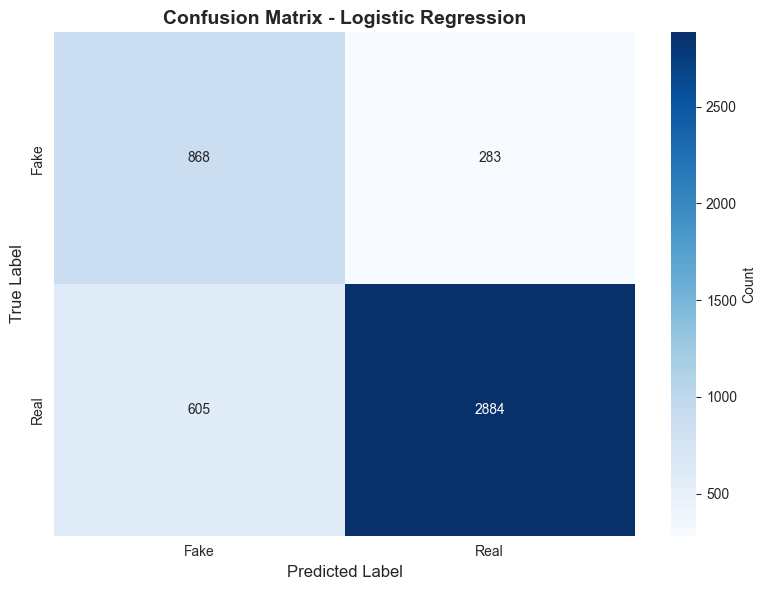


Classification Report - Logistic Regression
              precision    recall  f1-score   support

        Fake     0.5893    0.7541    0.6616      1151
        Real     0.9106    0.8266    0.8666      3489

    accuracy                         0.8086      4640
   macro avg     0.7500    0.7904    0.7641      4640
weighted avg     0.8309    0.8086    0.8157      4640



In [7]:
# Confusion matrix and classification report
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
print_classification_report(y_test, y_pred_lr, "Logistic Regression")


## 5. Model 3: Support Vector Machine (SVM)


In [8]:
# Train SVM model
print("Training SVM model (this may take a few minutes)...")
start_time = time.time()

svm_model = SVC(
    kernel='linear',
    random_state=42,
    class_weight='balanced',
    probability=True  # Enable probability estimates
)
svm_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate metrics
metrics_svm = calculate_metrics(y_test, y_pred_svm, "Support Vector Machine")
print_metrics(metrics_svm)


Training SVM model (this may take a few minutes)...
Training completed in 60.13 seconds
MODEL: Support Vector Machine

Overall Metrics:
  Accuracy:  0.7929
  Precision: 0.8246
  Recall:    0.7929
  F1-Score:  0.8022

Class 0 (Fake News) Metrics:
  Precision: 0.5605
  Recall:    0.7646
  F1-Score:  0.6468

Class 1 (Real News) Metrics:
  Precision: 0.9117
  Recall:    0.8022
  F1-Score:  0.8535


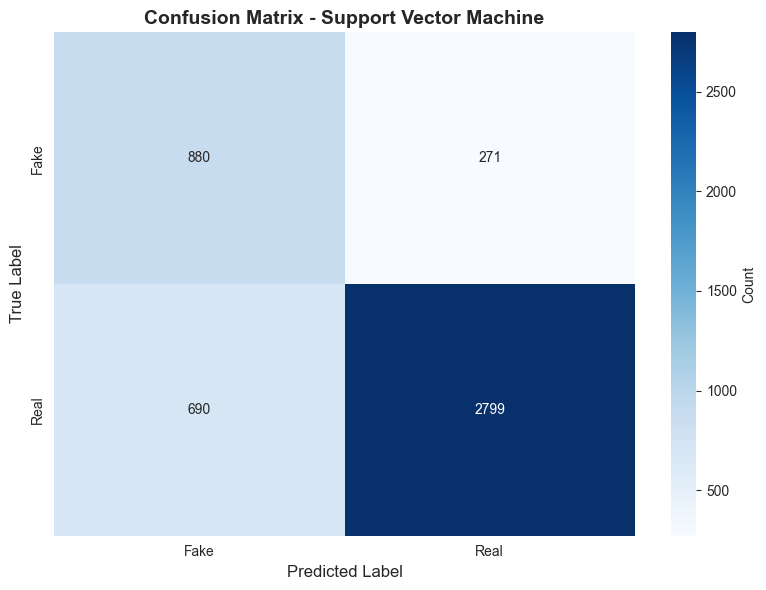


Classification Report - Support Vector Machine
              precision    recall  f1-score   support

        Fake     0.5605    0.7646    0.6468      1151
        Real     0.9117    0.8022    0.8535      3489

    accuracy                         0.7929      4640
   macro avg     0.7361    0.7834    0.7502      4640
weighted avg     0.8246    0.7929    0.8022      4640



In [9]:
# Confusion matrix and classification report
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")
print_classification_report(y_test, y_pred_svm, "Support Vector Machine")


## 6. Model 4: Random Forest


In [10]:
# Train Random Forest model
print("Training Random Forest model...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate metrics
metrics_rf = calculate_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(metrics_rf)


Training Random Forest model...
Training completed in 0.25 seconds
MODEL: Random Forest

Overall Metrics:
  Accuracy:  0.8063
  Precision: 0.7985
  Recall:    0.8063
  F1-Score:  0.8013

Class 0 (Fake News) Metrics:
  Precision: 0.6268
  Recall:    0.5413
  F1-Score:  0.5809

Class 1 (Real News) Metrics:
  Precision: 0.8552
  Recall:    0.8937
  F1-Score:  0.8740


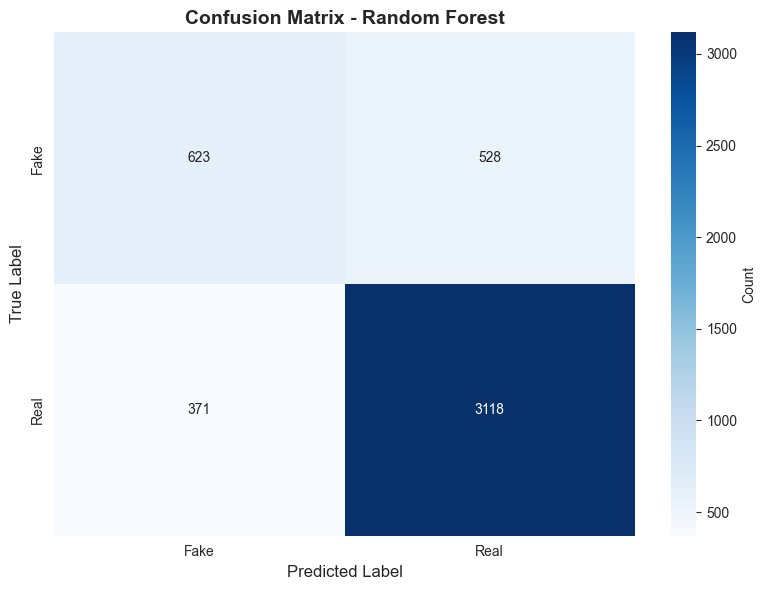


Classification Report - Random Forest
              precision    recall  f1-score   support

        Fake     0.6268    0.5413    0.5809      1151
        Real     0.8552    0.8937    0.8740      3489

    accuracy                         0.8063      4640
   macro avg     0.7410    0.7175    0.7274      4640
weighted avg     0.7985    0.8063    0.8013      4640



In [11]:
# Confusion matrix and classification report
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
print_classification_report(y_test, y_pred_rf, "Random Forest")


## 7. Feature Importance Analysis (Random Forest)


Top 20 Most Important Features:
               feature  importance
3433              pitt    0.028980
2287  jennifer aniston    0.027977
241           angelina    0.027880
623               brad    0.026911
3733            report    0.026853
624          brad pitt    0.021218
2286          jennifer    0.020998
3974            season    0.019660
2400            justin    0.019142
2354             jolie    0.017832
2276            jenner    0.014951
242     angelina jolie    0.014158
4656             trump    0.012257
4010            selena    0.012249
566              blake    0.012149
245            aniston    0.011742
712            caitlyn    0.011544
1898              gwen    0.011446
570      blake shelton    0.010614
362             awards    0.010524


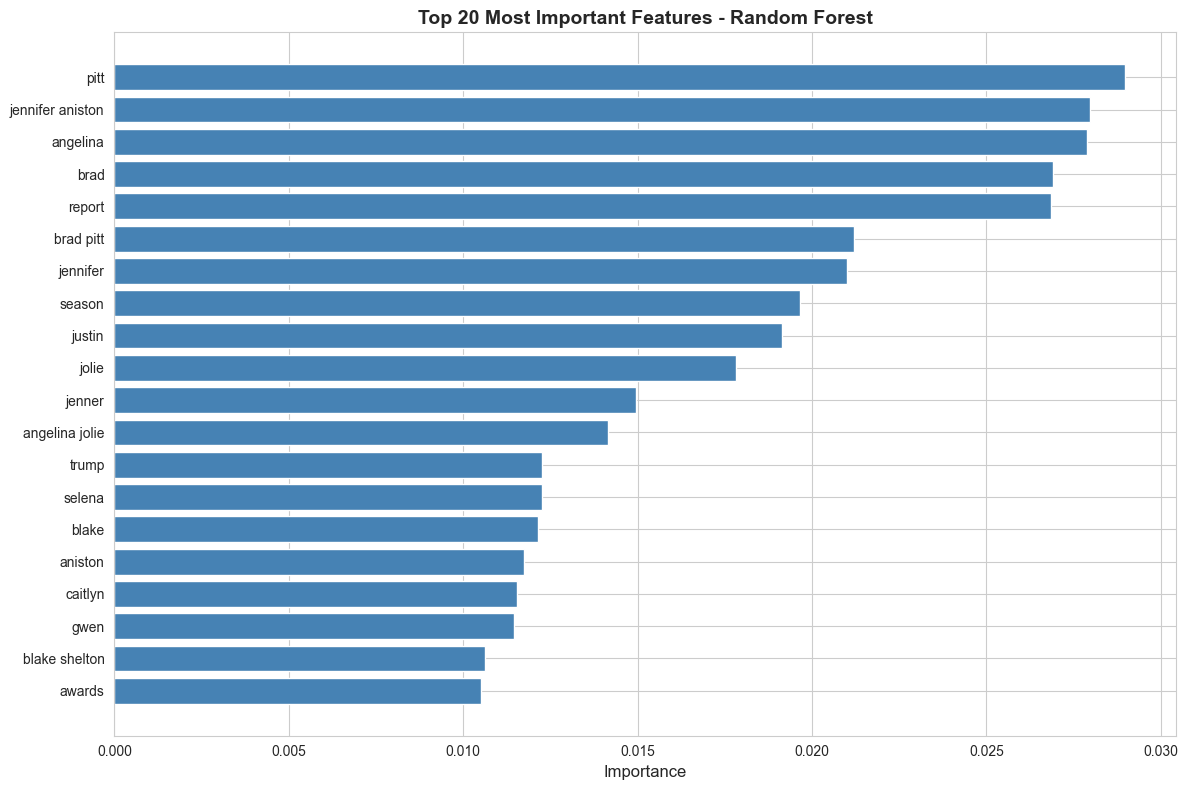

In [12]:
# Get feature importance from Random Forest
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importance = rf_model.feature_importances_

# Create dataframe of top features
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(importance_df.head(20))

# Visualize top features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 8. Model Comparison


In [13]:
# Collect all model results
all_results = [metrics_nb, metrics_lr, metrics_svm, metrics_rf]

# Create comparison dataframe
comparison_df = compare_models(all_results)
print("\nModel Comparison:")
print("=" * 80)
print(comparison_df.round(4))
print("=" * 80)



Model Comparison:
                        accuracy  precision  recall  f1_score
model_name                                                   
Naive Bayes               0.8373     0.8290  0.8373    0.8268
Logistic Regression       0.8086     0.8309  0.8086    0.8157
Support Vector Machine    0.7929     0.8246  0.7929    0.8022
Random Forest             0.8062     0.7985  0.8062    0.8013


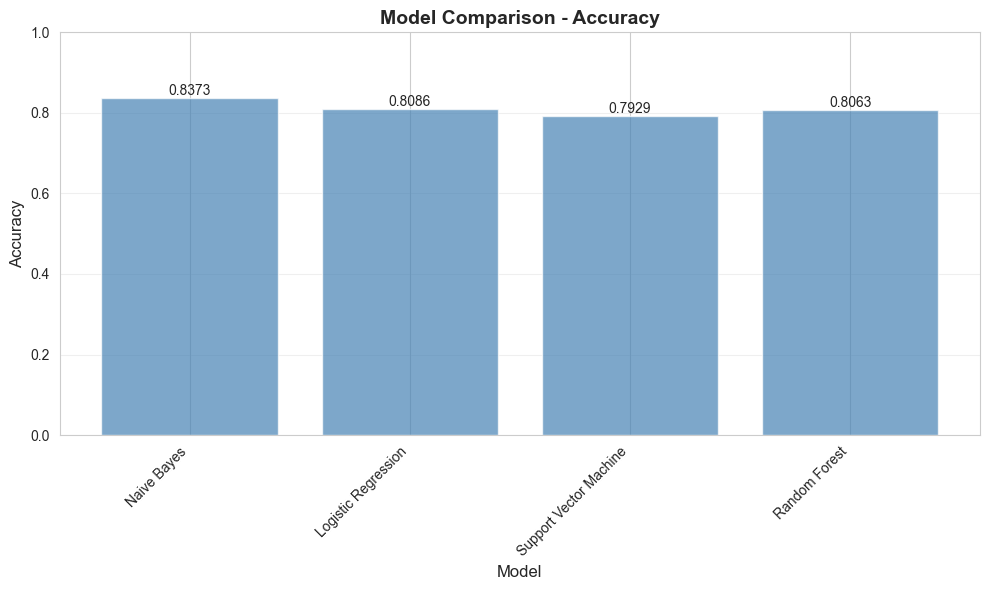

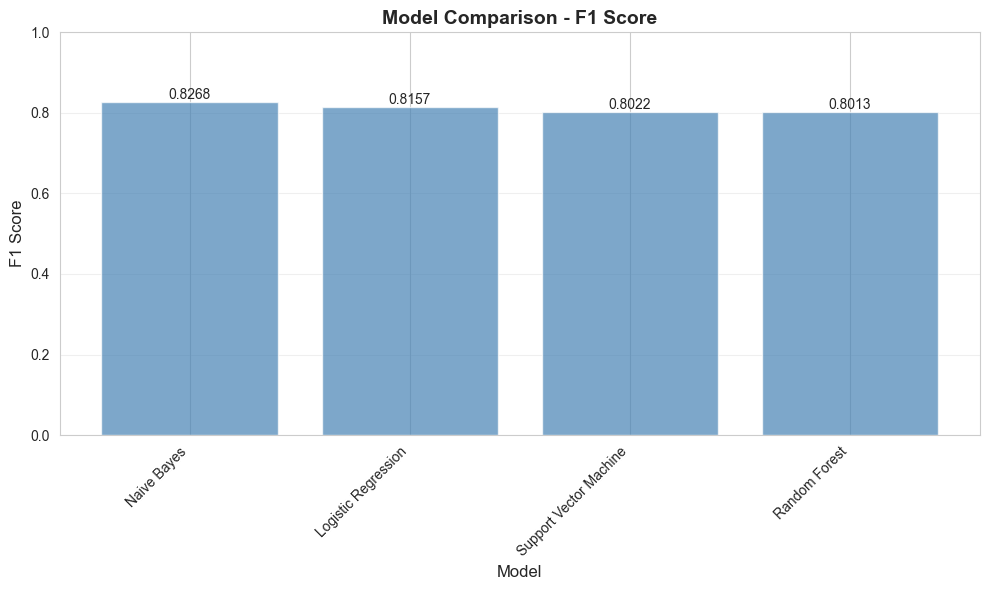

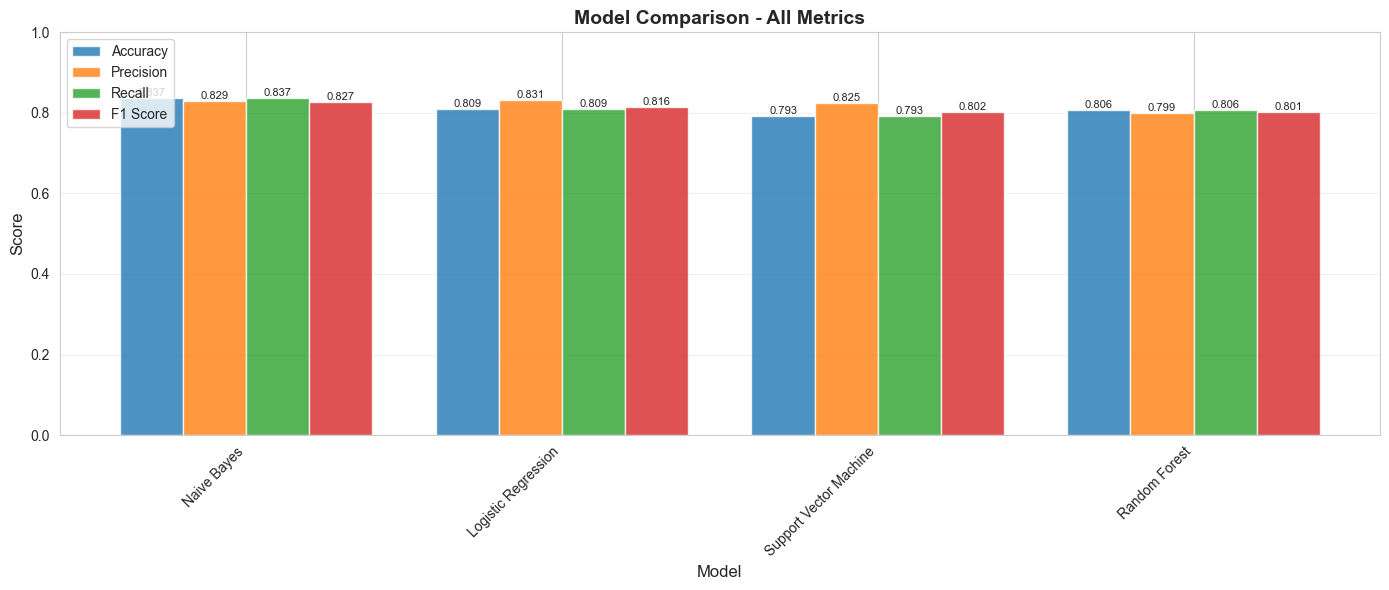

In [14]:
# Visualize model comparison
plot_model_comparison(all_results, metric='accuracy')
plot_model_comparison(all_results, metric='f1_score')
plot_all_metrics_comparison(all_results)


## 9. Summary and Conclusions

### Model Performance Summary

Four classical machine learning models were trained and evaluated on the fake news detection task using TF-IDF vectorization with unigrams and bigrams. The results reveal interesting patterns in how different algorithms handle the classification problem.

**Overall Performance Rankings:**

1. **Naive Bayes** achieved the highest accuracy of 83.73%, making it the best performing model in terms of overall correctness. However, this comes with a significant trade-off: the model has poor recall for fake news (52.22%), meaning it misses nearly half of the fake news articles. The model excels at identifying real news with 94.12% recall and 89.69% F1-score, but struggles with the minority class.

2. **Logistic Regression** achieved 80.86% accuracy with better balance between classes. With class weighting enabled, it achieved 75.41% recall for fake news, which is substantially better than Naive Bayes. The trade-off is lower precision for fake news (58.93%), indicating more false positives.

3. **Random Forest** showed 80.63% accuracy with moderate performance on both classes. The model provides feature importance insights, revealing that celebrity names and entertainment-related terms are highly discriminative features in the dataset.

4. **Support Vector Machine** achieved 79.29% accuracy, the lowest among all models, while requiring the longest training time (60.13 seconds). The performance pattern is similar to Logistic Regression with better fake news recall but lower precision.

### Key Findings

**Class Imbalance Impact:** The 3:1 ratio between real and fake news significantly affects model behavior. Models without class balancing (Naive Bayes) tend to favor the majority class, achieving high accuracy but poor performance on fake news detection. Models with class_weight='balanced' (Logistic Regression, SVM, Random Forest) show improved recall for fake news but at the cost of lower precision, resulting in more false positives.

**Feature Importance Insights:** The Random Forest feature importance analysis reveals that celebrity names and entertainment-related bigrams (e.g., "jennifer aniston", "brad pitt", "angelina jolie") are among the most discriminative features. This suggests that the dataset may contain a significant portion of entertainment or celebrity gossip content, and these patterns help distinguish between real and fake news in this context. Political terms like "trump" also appear in the top features, indicating political content is another distinguishing factor.

**Training Efficiency:** Naive Bayes is by far the fastest model, training in just 0.01 seconds, making it highly suitable for real-time applications. Random Forest and Logistic Regression are also very fast (0.25 and 0.08 seconds respectively), while SVM requires over a minute for training, which may be impractical for large-scale applications.

**Performance Trade-offs:** There is a clear trade-off between overall accuracy and minority class performance. Naive Bayes maximizes accuracy but fails to detect fake news effectively. Balanced models improve fake news detection but reduce overall accuracy and precision. This trade-off is critical for real-world applications where missing fake news (false negatives) may be more costly than incorrectly flagging real news (false positives).

### Recommendations

For applications prioritizing overall accuracy and speed, Naive Bayes is the optimal choice. However, for applications where detecting fake news is critical, Logistic Regression or SVM with class balancing provide better recall for the minority class, despite lower overall accuracy.

The feature importance analysis suggests that the models are learning domain-specific patterns related to entertainment and celebrity content. This may limit generalizability to other types of news, and future work should explore whether these patterns hold across different news domains.
